# Forest Cover Type Prediction - Data Exploration & Analysis

This notebook performs comprehensive exploratory data analysis on the Forest Cover Type dataset to understand the data structure, distributions, and relationships between features.

## Dataset Overview
The dataset contains cartographic variables to predict forest cover type:
- 54 features (10 quantitative + 4 wilderness areas + 40 soil types)
- 7 forest cover types (classes 1-7)
- Target: Predict the predominant kind of tree cover

## 1. Environment Setup and Package Installation

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

All libraries imported successfully!
Pandas version: 2.3.2
NumPy version: 2.2.6


## 2. CUDA Configuration and PyTorch Setup

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# CUDA Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
    
# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

PyTorch version: 2.7.1+cu118
Device: cuda
CUDA available: True
GPU: NVIDIA GeForce RTX 3050 6GB Laptop GPU
CUDA version: 11.8
GPU Memory: 6.0 GB


## 3. Data Loading and Initial Exploration

In [ ]:
# Load the dataset
data_path = '../data/train.csv'
df = pd.read_csv(data_path)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Number of samples: {df.shape[0]}")

# Display first few rows
df.head()

Dataset loaded successfully!
Dataset shape: (15120, 56)
Number of features: 55
Number of samples: 15120


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
# Basic dataset information
print("Dataset Info:")
print("=" * 50)
df.info()

print("\nDataset Description:")
print("=" * 50)
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  i

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print("=" * 30)
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")
if duplicates == 0:
    print("✅ No duplicate rows found!")

Missing Values:
✅ No missing values found!

Duplicate rows: 0
✅ No duplicate rows found!


## 4. Target Variable Analysis

Forest Cover Type Distribution:
Cover Type 1: 2,160 samples (14.29%)
Cover Type 2: 2,160 samples (14.29%)
Cover Type 3: 2,160 samples (14.29%)
Cover Type 4: 2,160 samples (14.29%)
Cover Type 5: 2,160 samples (14.29%)
Cover Type 6: 2,160 samples (14.29%)
Cover Type 7: 2,160 samples (14.29%)


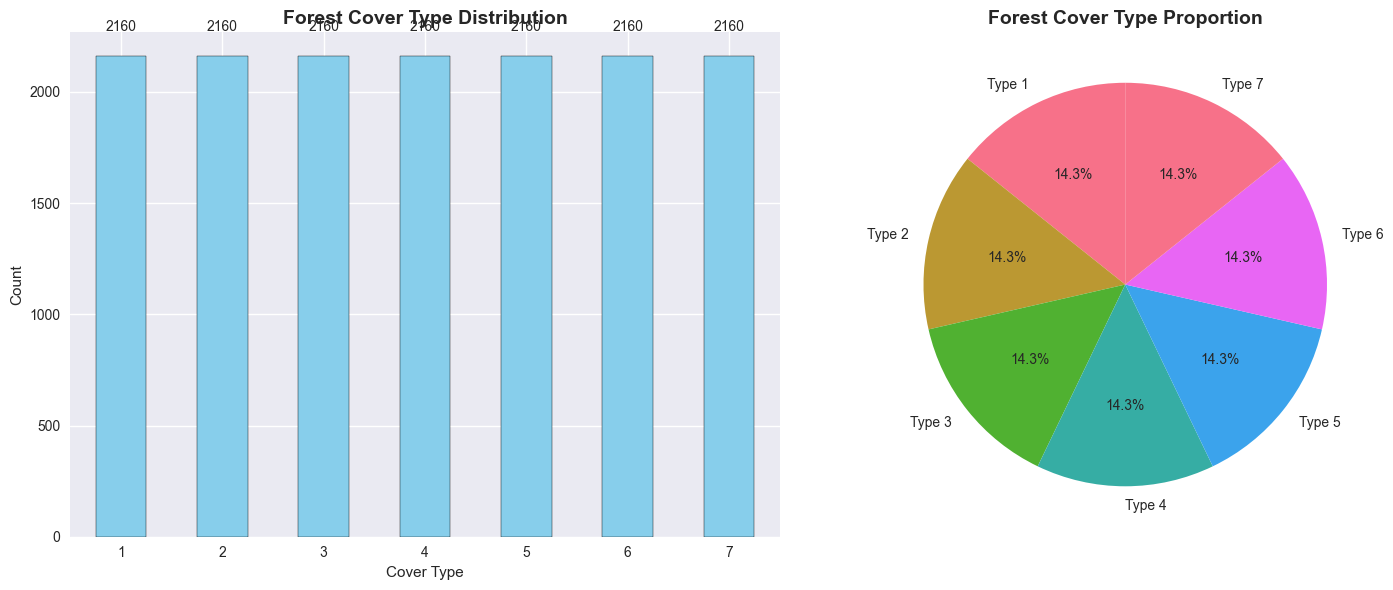


Class imbalance ratio: 1.00
✅ Relatively balanced classes


In [6]:
# Analyze target variable distribution
target_counts = df['Cover_Type'].value_counts().sort_index()
target_percentages = df['Cover_Type'].value_counts(normalize=True).sort_index() * 100

print("Forest Cover Type Distribution:")
print("=" * 40)
for cover_type in sorted(df['Cover_Type'].unique()):
    count = target_counts[cover_type]
    percentage = target_percentages[cover_type]
    print(f"Cover Type {cover_type}: {count:,} samples ({percentage:.2f}%)")

# Visualize target distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
target_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Forest Cover Type Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Add count labels on bars
for i, v in enumerate(target_counts.values):
    ax1.text(i, v + 100, str(v), ha='center', va='bottom')

# Pie chart
ax2.pie(target_counts.values, labels=[f'Type {i}' for i in target_counts.index], 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('Forest Cover Type Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
class_imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\nClass imbalance ratio: {class_imbalance_ratio:.2f}")
if class_imbalance_ratio > 5:
    print("⚠️ Significant class imbalance detected!")
else:
    print("✅ Relatively balanced classes")

## 5. Feature Analysis

In [7]:
# Separate features by type
# Quantitative features (first 10 columns after Id)
quantitative_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                        'Horizontal_Distance_To_Fire_Points']

# Wilderness areas (binary)
wilderness_features = [col for col in df.columns if col.startswith('Wilderness_Area')]

# Soil types (binary)
soil_features = [col for col in df.columns if col.startswith('Soil_Type')]

print(f"Quantitative features: {len(quantitative_features)}")
print(f"Wilderness area features: {len(wilderness_features)}")
print(f"Soil type features: {len(soil_features)}")
print(f"Total features: {len(quantitative_features) + len(wilderness_features) + len(soil_features)}")

Quantitative features: 10
Wilderness area features: 4
Soil type features: 40
Total features: 54


In [8]:
# Analyze quantitative features
print("Quantitative Features Statistics:")
print("=" * 50)
df[quantitative_features].describe()

Quantitative Features Statistics:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


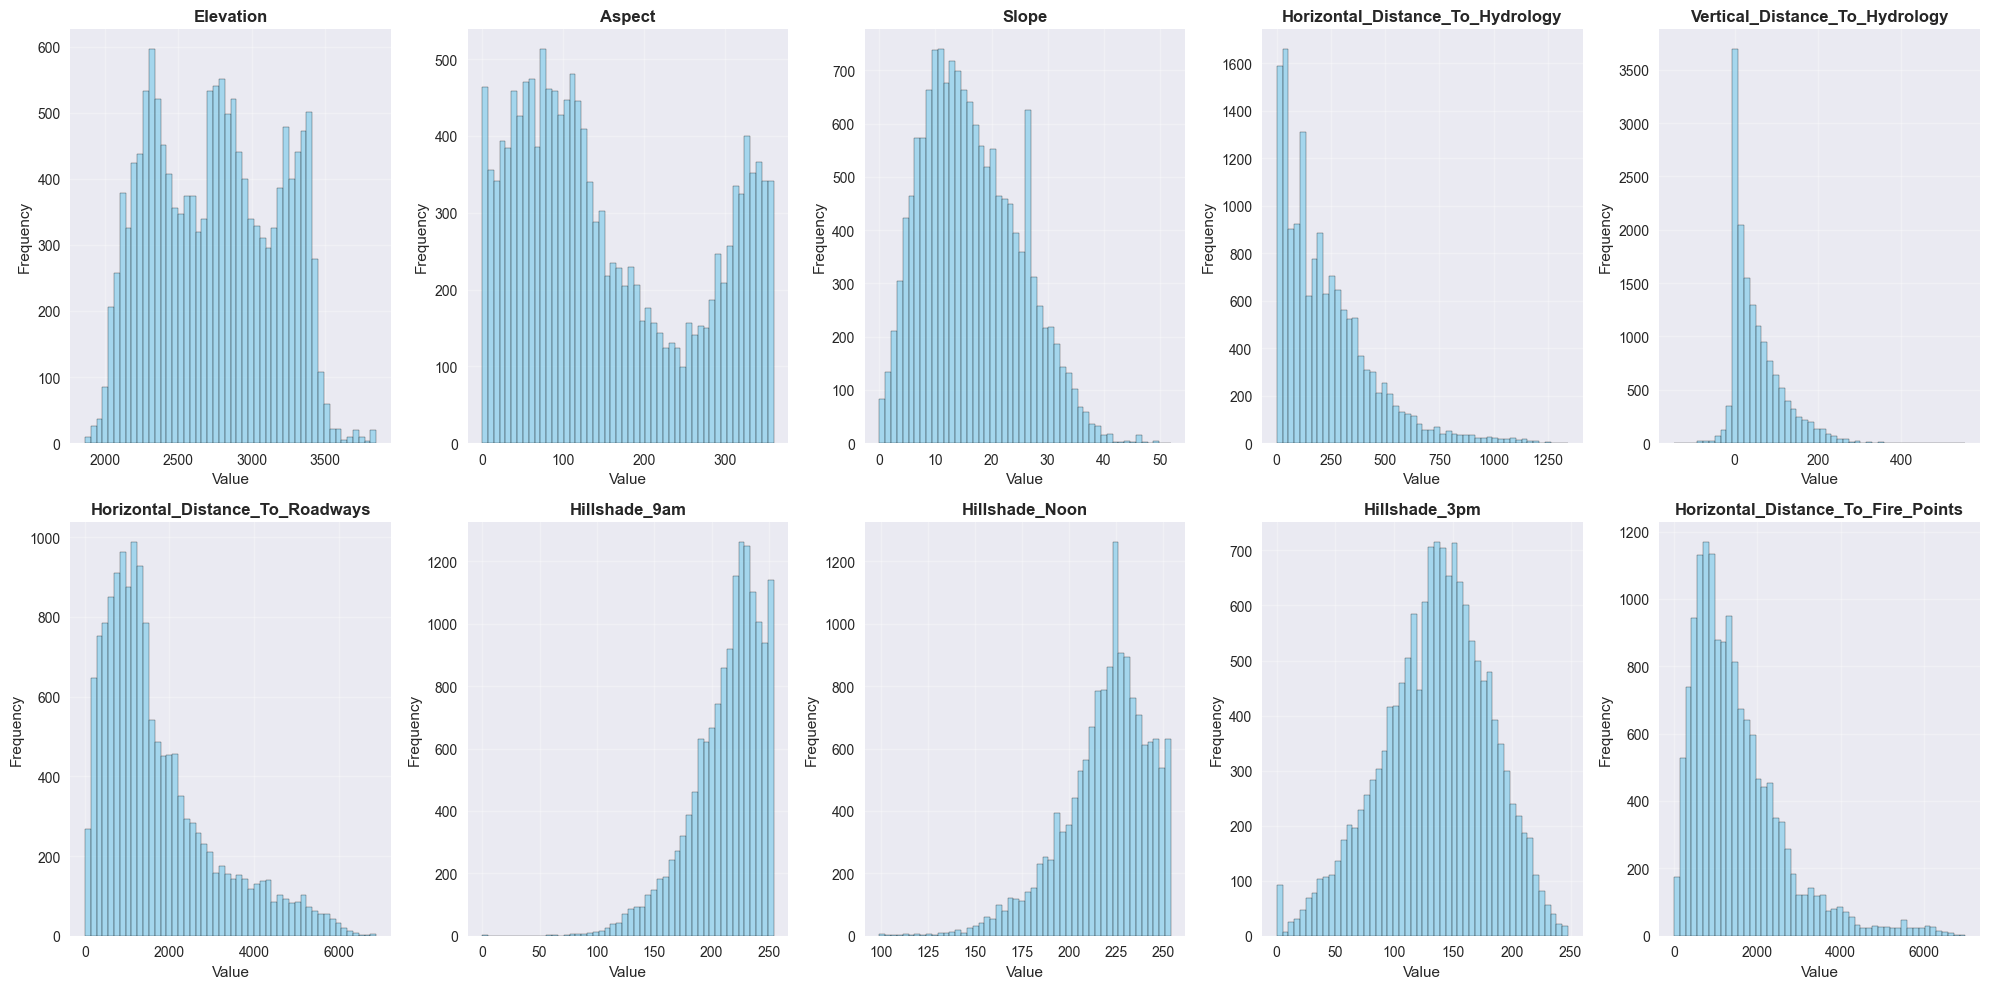

In [9]:
# Visualize distributions of quantitative features
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(quantitative_features):
    axes[i].hist(df[feature], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{feature}', fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

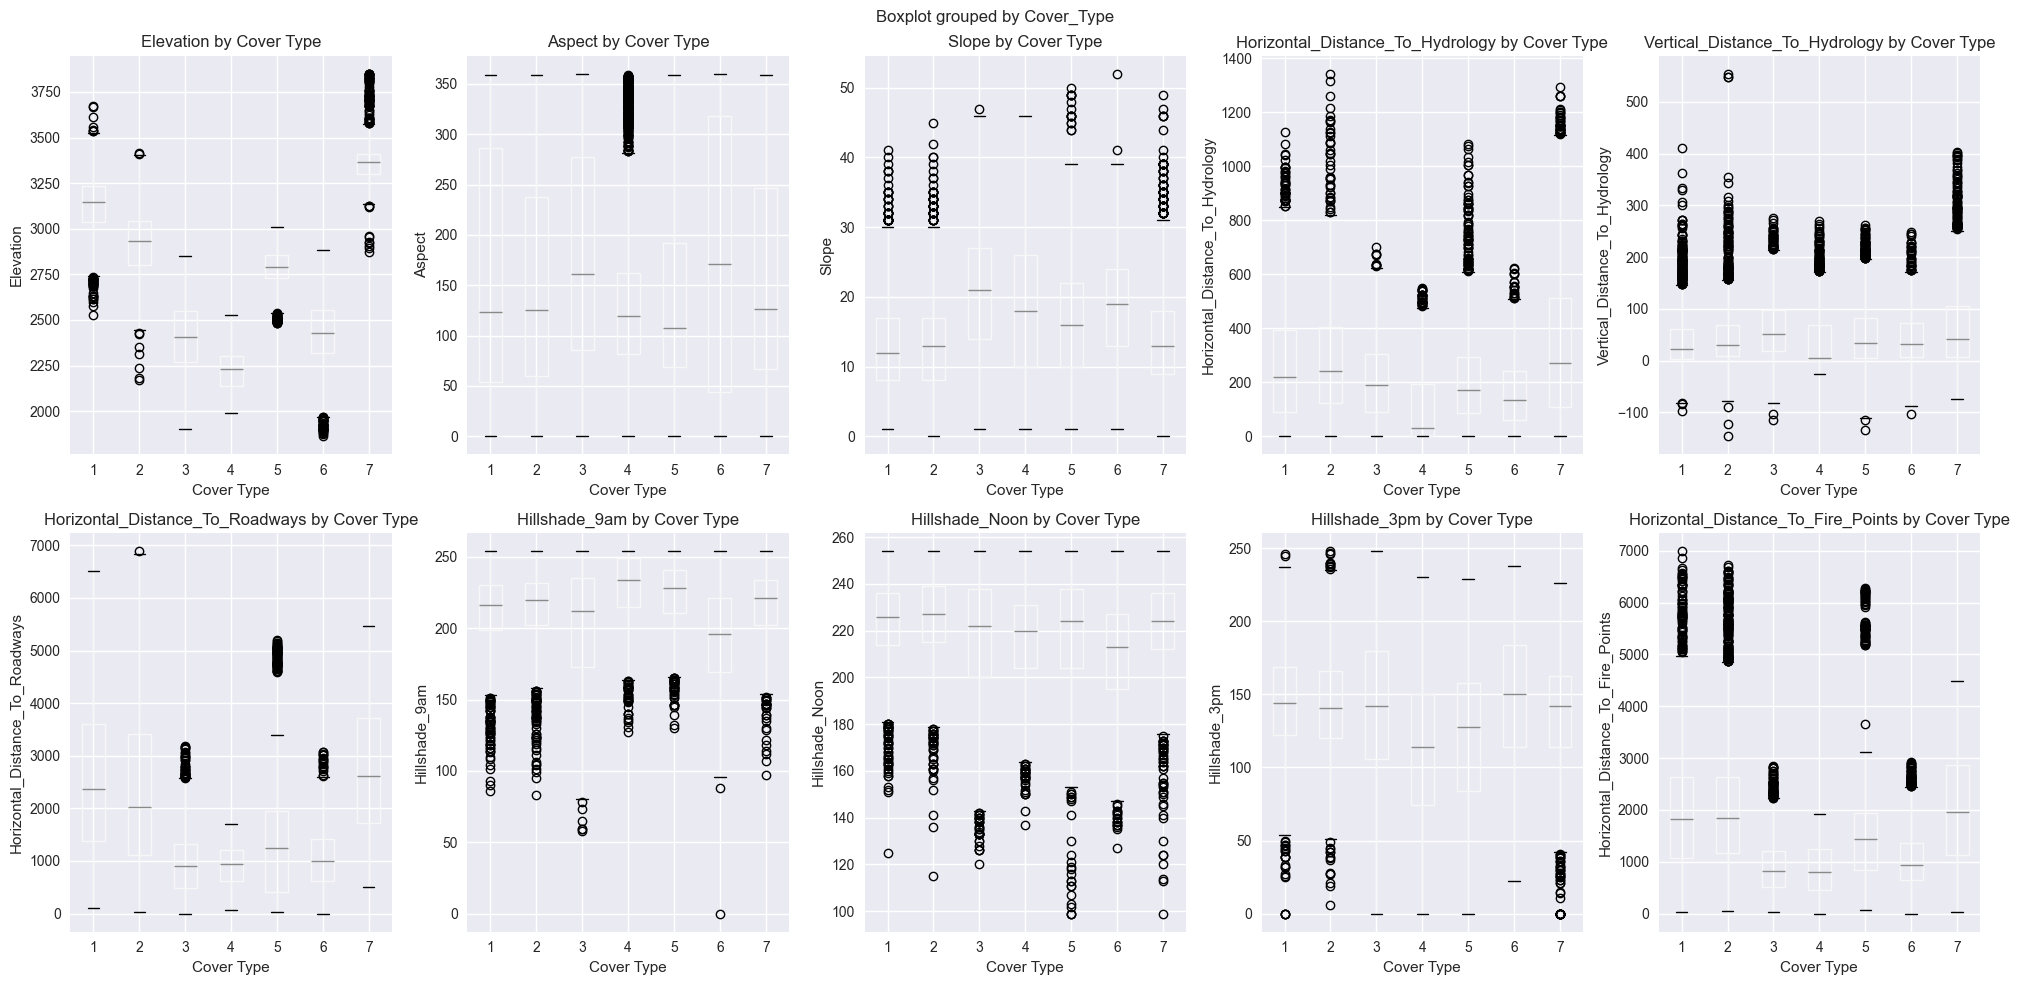

In [10]:
# Box plots for quantitative features by cover type
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(quantitative_features):
    df.boxplot(column=feature, by='Cover_Type', ax=axes[i])
    axes[i].set_title(f'{feature} by Cover Type')
    axes[i].set_xlabel('Cover Type')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

## 6. Wilderness Areas and Soil Types Analysis

Wilderness Areas Distribution:
Wilderness_Area3: 6,349 samples (41.99%)
Wilderness_Area4: 4,675 samples (30.92%)
Wilderness_Area1: 3,597 samples (23.79%)
Wilderness_Area2: 499 samples (3.30%)


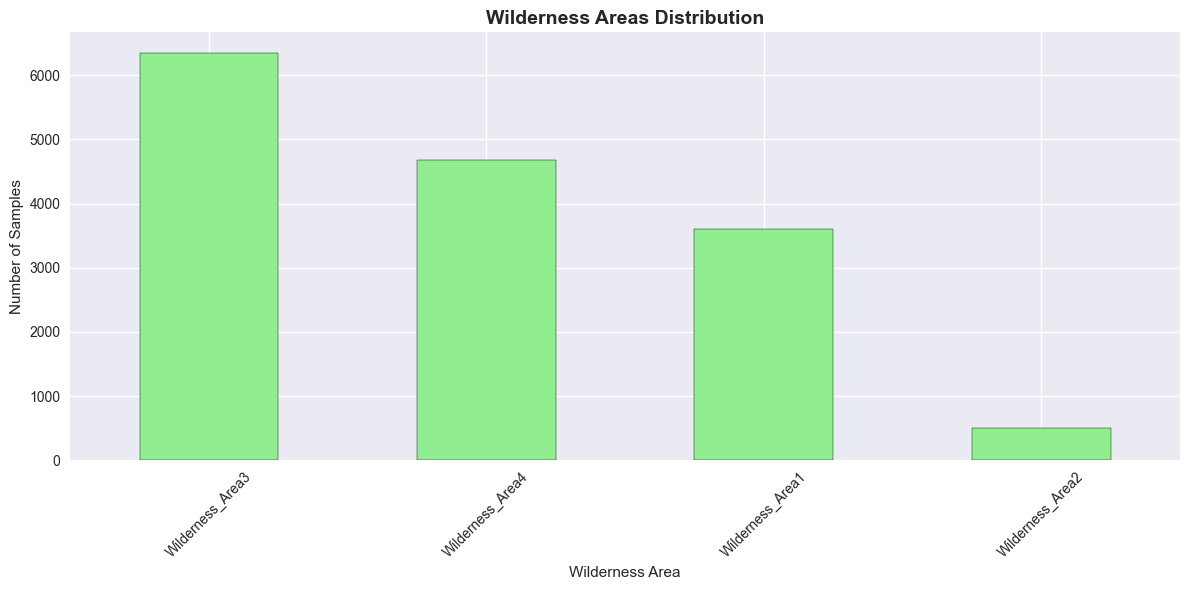

In [11]:
# Analyze wilderness areas
print("Wilderness Areas Distribution:")
print("=" * 40)
wilderness_counts = df[wilderness_features].sum().sort_values(ascending=False)
wilderness_percentages = (wilderness_counts / len(df)) * 100

for area in wilderness_counts.index:
    count = wilderness_counts[area]
    percentage = wilderness_percentages[area]
    print(f"{area}: {count:,} samples ({percentage:.2f}%)")

# Visualize wilderness areas
plt.figure(figsize=(12, 6))
wilderness_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Wilderness Areas Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Wilderness Area')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Analyze soil types
print("Soil Types Distribution (Top 10):")
print("=" * 40)
soil_counts = df[soil_features].sum().sort_values(ascending=False)
soil_percentages = (soil_counts / len(df)) * 100

# Show top 10 soil types
for soil in soil_counts.head(10).index:
    count = soil_counts[soil]
    percentage = soil_percentages[soil]
    print(f"{soil}: {count:,} samples ({percentage:.2f}%)")

# Count how many soil types are actually used
used_soil_types = (soil_counts > 0).sum()
print(f"\nUsed soil types: {used_soil_types} out of {len(soil_features)}")
print(f"Unused soil types: {len(soil_features) - used_soil_types}")

Soil Types Distribution (Top 10):
Soil_Type10: 2,142 samples (14.17%)
Soil_Type29: 1,291 samples (8.54%)
Soil_Type3: 962 samples (6.36%)
Soil_Type4: 843 samples (5.58%)
Soil_Type23: 757 samples (5.01%)
Soil_Type38: 728 samples (4.81%)
Soil_Type30: 725 samples (4.79%)
Soil_Type32: 690 samples (4.56%)
Soil_Type39: 657 samples (4.35%)
Soil_Type6: 650 samples (4.30%)

Used soil types: 38 out of 40
Unused soil types: 2


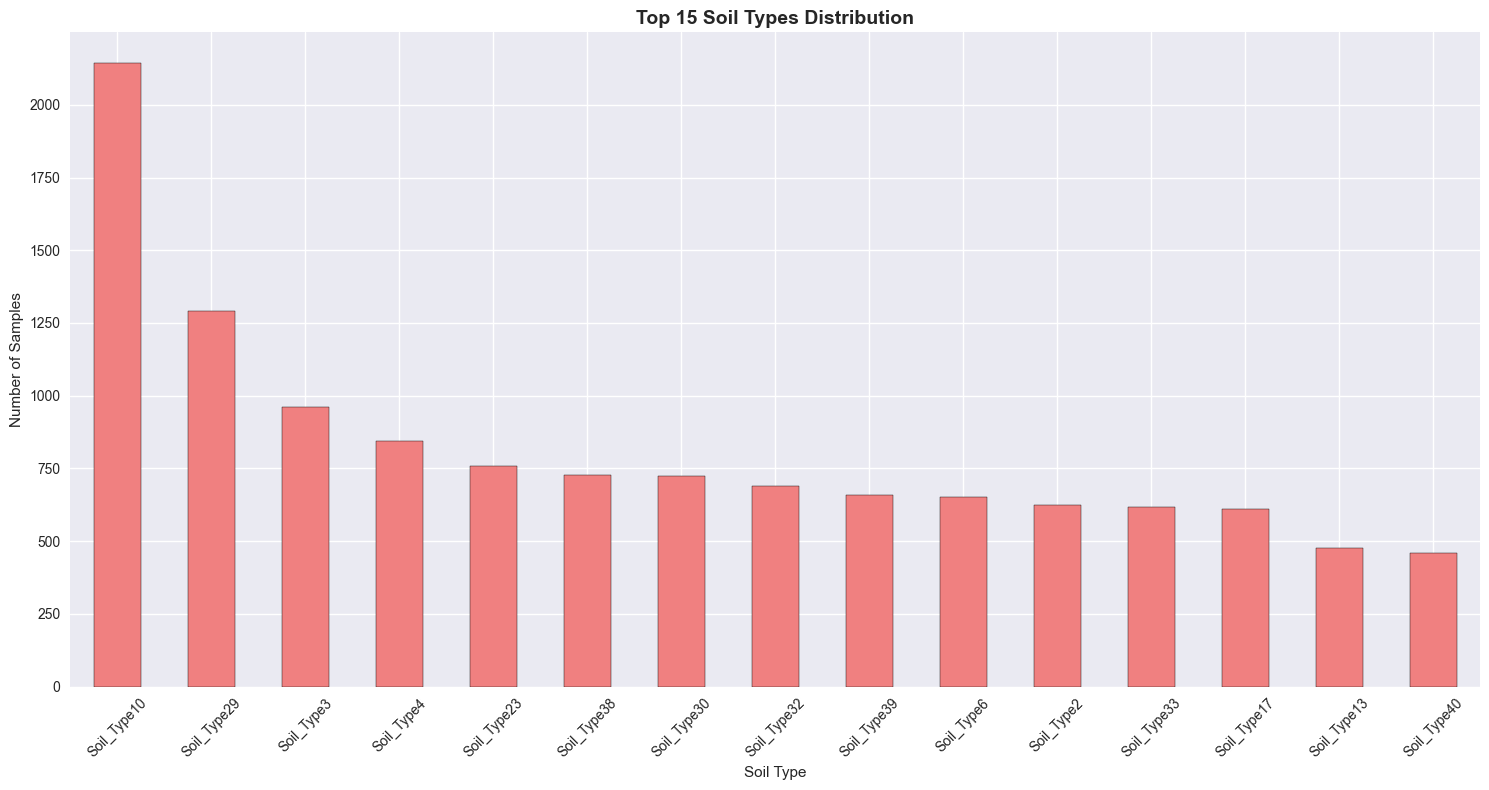

In [13]:
# Visualize top soil types
plt.figure(figsize=(15, 8))
top_soils = soil_counts[soil_counts > 0].head(15)
top_soils.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 15 Soil Types Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Soil Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Feature Correlation Analysis

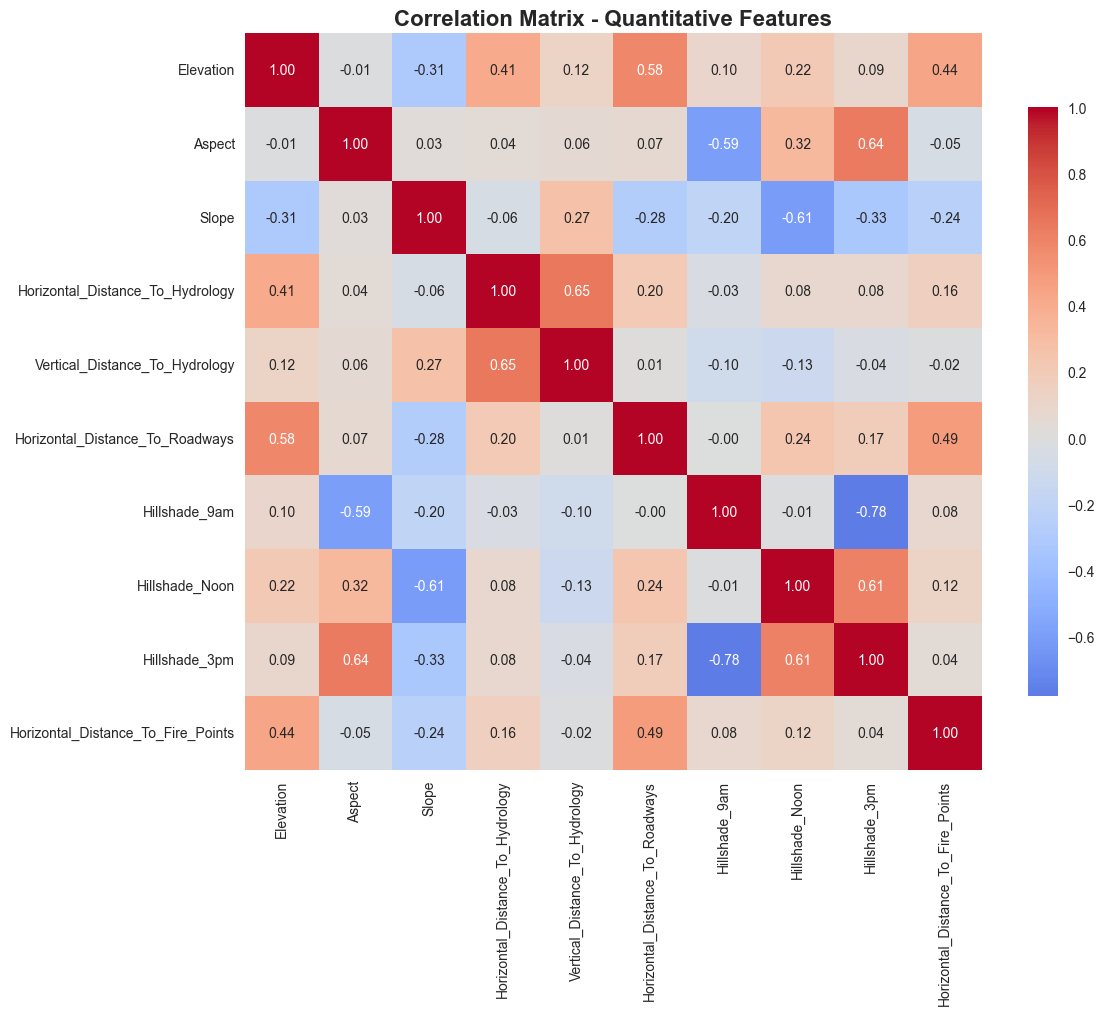


Highly Correlated Feature Pairs (|correlation| > 0.7):
Hillshade_9am <-> Hillshade_3pm: -0.780


: 

In [ ]:
# Correlation matrix for quantitative features
correlation_matrix = df[quantitative_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Quantitative Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    print("=" * 60)
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} <-> {feat2}: {corr:.3f}")
else:
    print("\n✅ No highly correlated features found (|correlation| > 0.7)")

## 8. Feature Importance with Target Variable

In [ ]:
# Calculate correlation with target variable
target_correlations = []
for feature in quantitative_features:
    corr = df[feature].corr(df['Cover_Type'])
    target_correlations.append((feature, abs(corr)))

# Sort by absolute correlation
target_correlations.sort(key=lambda x: x[1], reverse=True)

print("Feature Correlation with Target (Cover_Type):")
print("=" * 50)
for feature, corr in target_correlations:
    print(f"{feature}: {corr:.4f}")

# Visualize feature importance
features, correlations = zip(*target_correlations)
plt.figure(figsize=(12, 8))
plt.barh(features, correlations, color='lightblue', edgecolor='black')
plt.title('Feature Correlation with Target Variable', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## 9. Statistical Tests and Insights

In [ ]:
# Statistical summary by cover type
print("Statistical Summary by Cover Type:")
print("=" * 50)

for cover_type in sorted(df['Cover_Type'].unique()):
    subset = df[df['Cover_Type'] == cover_type][quantitative_features]
    print(f"\nCover Type {cover_type}:")
    print(f"Sample count: {len(subset)}")
    print(f"Mean elevation: {subset['Elevation'].mean():.1f}")
    print(f"Mean slope: {subset['Slope'].mean():.1f}")
    print(f"Mean distance to hydrology: {subset['Horizontal_Distance_To_Hydrology'].mean():.1f}")

In [ ]:
# Check for outliers using IQR method
print("Outlier Detection (IQR Method):")
print("=" * 40)

outlier_counts = {}
for feature in quantitative_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_counts[feature] = len(outliers)
    
    if len(outliers) > 0:
        percentage = (len(outliers) / len(df)) * 100
        print(f"{feature}: {len(outliers)} outliers ({percentage:.2f}%)")

if sum(outlier_counts.values()) == 0:
    print("✅ No significant outliers detected!")

## 10. Data Quality Assessment

In [ ]:
# Final data quality assessment
print("Data Quality Assessment Summary:")
print("=" * 50)

# 1. Completeness
completeness = (1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
print(f"Data Completeness: {completeness:.2f}%")

# 2. Consistency
# Check if wilderness areas are mutually exclusive
wilderness_sum = df[wilderness_features].sum(axis=1)
multiple_wilderness = (wilderness_sum > 1).sum()
print(f"Samples with multiple wilderness areas: {multiple_wilderness}")

# Check if soil types are mutually exclusive
soil_sum = df[soil_features].sum(axis=1)
multiple_soil = (soil_sum > 1).sum()
print(f"Samples with multiple soil types: {multiple_soil}")

# 3. Target variable distribution
target_variance = df['Cover_Type'].value_counts().var()
print(f"Target class variance: {target_variance:.2f}")

# 4. Feature variance
low_variance_features = []
for feature in quantitative_features:
    if df[feature].var() < 1:
        low_variance_features.append(feature)

if low_variance_features:
    print(f"Low variance features: {low_variance_features}")
else:
    print("✅ All quantitative features have sufficient variance")

print("\n" + "=" * 50)
print("EDA COMPLETED SUCCESSFULLY!")
print("Ready for data preprocessing and model development.")
print("=" * 50)